In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('train.csv', index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [7]:
import seaborn as sns


In [62]:
def cleanData(d):
    numNa = np.sum(d.isna().values.T, axis = 1)
    print(d.columns[numNa > 81])
    print(numNa[numNa > 81])
    
    df = d.drop(d.columns[numNa > 81], axis = 1)
    df.dropna(inplace = True)
    df = pd.get_dummies(df)
    return df


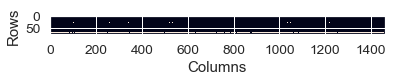

In [19]:
plt.imshow(df.isna().T)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.savefig('na.png')

In [101]:
df.drop(df.columns[numNa > 81], axis = 1, inplace = True)
df.shape

(1460, 75)

In [99]:
numNa = np.sum(df.isna().values.T, axis = 1)

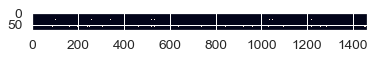

In [102]:
plt.imshow(dfropped.isna().T)

In [71]:
df = cleanData(df)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
[ 259 1369  690 1453 1179 1406]


## Distribution of sale price

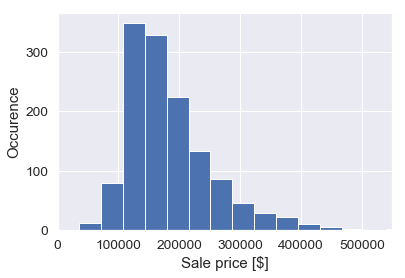

In [28]:
plt.hist(df['SalePrice'].values, bins = 20)
plt.xlim(0., 550000)
plt.xlabel('Sale price [$]')
plt.ylabel('Occurence')
plt.savefig('1.png', bbox_inches='tight')

In [15]:
print("Average {}".format(np.average(df['SalePrice'].values)))
print("Median {}".format(np.median(df['SalePrice'].values)))
print("Standard deviation {}".format(np.std(df['SalePrice'].values)))

Average 186761.78251121077
Median 168500.0
Standard deviation 78884.3526759169


## Numeric features and their correlation

In [47]:
num = df.select_dtypes(include = [np.number])

In [52]:
corr = num.corr()
corr['SalePrice'].sort_values(ascending = False)[:5]

SalePrice      1.000000
OverallQual    0.783546
GrLivArea      0.711706
GarageCars     0.640154
GarageArea     0.607535
Name: SalePrice, dtype: float64

In [30]:
bestFeatures = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']

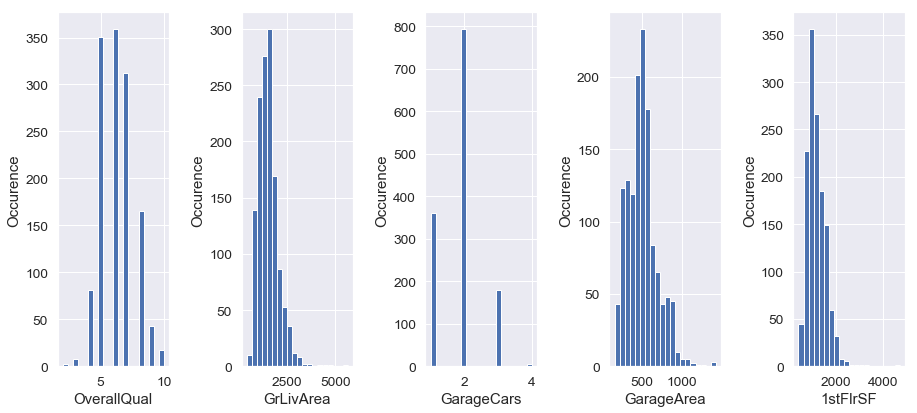

In [59]:
fig = plt.figure(figsize=(13, 6))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.hist(df[bestFeatures[i-1]].values, bins = 20)
    plt.xlabel('%s' %bestFeatures[i-1])
    plt.ylabel('Occurence')
plt.tight_layout()
plt.savefig('dist_.png')

<Figure size 432x288 with 0 Axes>

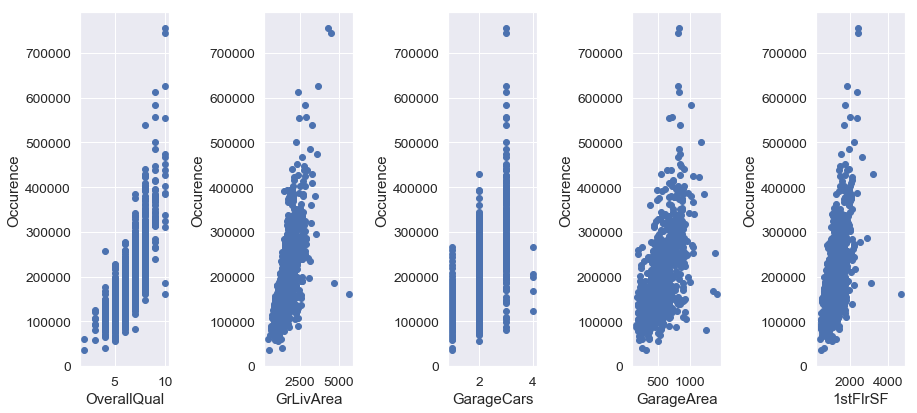

In [58]:
plt.clf()
fig = plt.figure(figsize=(13, 6))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.plot(df[bestFeatures[i-1]].values, df['SalePrice'].values, 'o')
    plt.xlabel('%s' %bestFeatures[i-1])
    plt.ylabel('Occurence')
plt.tight_layout()
plt.savefig('scatter.png')

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
num2 = df.drop('SalePrice', axis= 1).select_dtypes(include = [np.number])
pca_result = pca.fit_transform(num2.values)

#df['pca-one'] = pca_result[:,0]
#df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

In [66]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98598908 0.00439241 0.00323438]


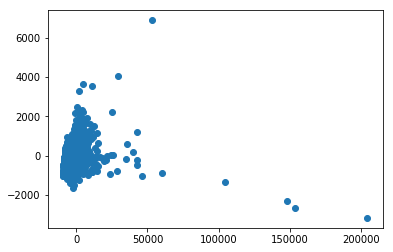

In [76]:
plt.plot(df['pca-one'].values, df['pca-two'].values, 'o')

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num2)
numStd = scaler.transform(num2)

In [74]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numStd)

#df['pca-one'] = pca_result[:,0]
#df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

In [75]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06789734 0.03135696 0.02557644]


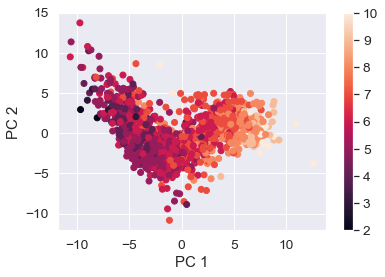

In [80]:
plt.clf()
plt.scatter(pca_result[:,0],  pca_result[:,1] , c=df['OverallQual'].values)
plt.colorbar()
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.savefig('pca.png', bbox_inches='tight')

## TSNE


In [40]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)
tsne_results = tsne.fit_transform(numStd)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1338 samples in 0.022s...
[t-SNE] Computed neighbors for 1338 samples in 1.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1338
[t-SNE] Computed conditional probabilities for sample 1338 / 1338
[t-SNE] Mean sigma: 4.600145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.226036
[t-SNE] Error after 400 iterations: 1.260010


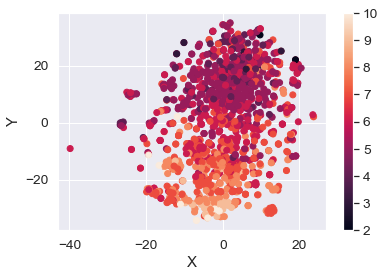

In [77]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=df['OverallQual'].values)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('tsne.png', bbox_inches='tight')

In [92]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pca-one,pca-two,pca-three
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,1.394515,0.438389,-1.425343
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,-0.441891,-0.934093,1.168327
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,1.530401,0.358570,-1.263756
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,-0.422887,1.098735,0.801053
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,4.318098,1.245237,-0.232596


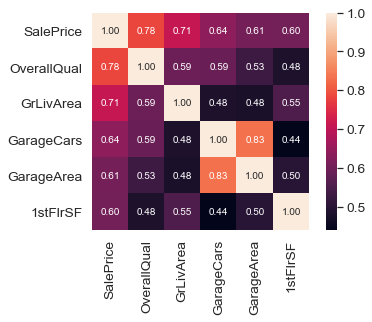

In [64]:
k = 6 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

In [106]:
df.shape

(1338, 75)

In [36]:
dff = pd.get_dummies(df)

In [37]:
dff.shape

(1338, 265)

In [38]:
num_ = dff.select_dtypes(include = [np.number])

(1338, 266)

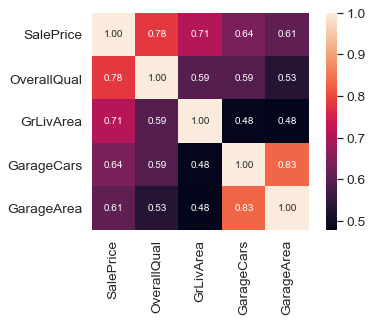

In [113]:
k = 5 #number of variables for heatmap
corrmat = dff.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dff[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [39]:
scaler = StandardScaler().fit(num_)
numStd = scaler.transform(num_)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)
tsne_results = tsne.fit_transform(numStd)
plt.plot(tsne_results[:,0], tsne_results[:,1],'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('tsne.png')

NameError: name 'TSNE' is not defined

NameError: name 'iris' is not defined

In [81]:
X = df.drop('SalePrice', axis = 1).values
Y = df['SalePrice'].values.reshape(-1,1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
scaler = StandardScaler().fit(Y)
Y = scaler.transform(Y)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from scipy.stats import pearsonr


def measureAcc(model, X, Y, kfold = 5):
    kf = KFold(n_splits = kfold)
    mse = []
    mae = []
    corr = []
    
    for train_index, test_index in kf.split(X):
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            #nn = KNeighborsRegressor(n_neighbors=10)
            model.fit(x_train, y_train)
            pred = model.predict(x_test)
            mae.append(mean_absolute_error(pred, y_test))       
            mse.append(mean_squared_error(pred, y_test))       
            corr.append(pearsonr(pred, y_test)[0])       
    dictionary = {}
    dictionary['mse'] = mse
    dictionary['mae'] = mae
    dictionary['corr'] = corr
    return dictionary

def calcAvg(measure):
    dictionary = {}
    dictionary['mse'] = np.average(np.array(measure['mse']))
    dictionary['mseStd'] = np.std(np.array(measure['mse']))
    dictionary['mae'] = np.average(np.array(measure['mae']))
    dictionary['maeStd'] = np.std(np.array(measure['mae']))
    dictionary['corr'] = np.average(np.array(measure['corr']))
    dictionary['corrStd'] = np.std(np.array(measure['corr']))
    return dictionary
    


C:\Users\balin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [82]:
arr = []
for i in range(1, 16):
    n = KNeighborsRegressor(n_neighbors = i)
    d = measureAcc(n, X, Y)
    arr.append(list(calcAvg(d).values()))
    

In [84]:
arr = np.array(arr)

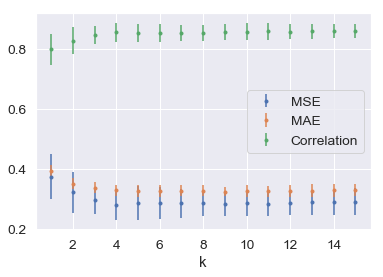

In [85]:
plt.errorbar(np.arange(1, 16, 1), arr[:,0], yerr = arr[:,1],fmt = '.', label='MSE')
plt.errorbar(np.arange(1, 16, 1), arr[:,2], yerr = arr[:,3],fmt= '.', label='MAE')
plt.errorbar(np.arange(1, 16, 1), arr[:,4], yerr = arr[:,5],fmt='.', label='Correlation')
plt.legend(loc='best')
plt.xlabel('k')
plt.savefig('knn.png')

In [205]:
np.argmax(arr[:,4])

13

In [160]:
test = pd.read_csv('test.csv')
test_df  = cleanData(test)

In [161]:
test_df.shape

(1319, 245)

## Best KNN: n = 13

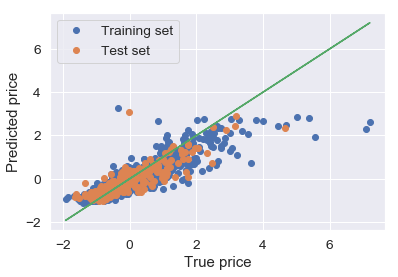

In [87]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

nn = KNeighborsRegressor(n_neighbors=13)
nn.fit(X_train, Y_train)
pred = nn.predict(X_train)
pred_test =  nn.predict(X_test)
plt.plot(Y_train, pred,'o', label='Training set')
plt.plot(Y_test, pred_test,'o', label='Test set')
plt.plot(Y, Y,'-')
plt.legend(loc='best')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.savefig('knn_13.png')

## Iterative forward selection

In [254]:
from sklearn import linear_model

import itertools
#Initialization variables
k = 264

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    
    

X = df.drop('SalePrice', axis = 1).values
Y = df['SalePrice'].values.reshape(-1,1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
scaler = StandardScaler().fit(Y)
Y = scaler.transform(Y)
X = pd.DataFrame(data=X,columns=df.drop('SalePrice', axis = 1).columns)  # 1st row as the column names

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()
    

C:\Users\balin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [212]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['OverallQual'], 517.0),
 (2, ['OverallQual', 'GrLivArea'], 391.0),
 (3, ['OverallQual', 'GrLivArea', 'BsmtQual_Ex'], 343.0),
 (4, ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile'], 314.0)]

In [222]:
model_k = linear_model.LinearRegression(fit_intercept = True)
X[features_list[5]].values

array([[ 0.58933748,  0.33132137, -0.31388241, -0.02734855,  0.52715718],
       [-0.16596285, -0.52957906, -0.31388241, -0.02734855,  1.12023956],
       [ 0.58933748,  0.47736698, -0.31388241, -0.02734855,  0.04745819],
       ...,
       [ 0.58933748,  1.54196259, -0.31388241, -0.02734855, -0.41261674],
       [-0.92126319, -0.88316316, -0.31388241, -0.02734855, -0.90539843],
       [-0.92126319, -0.54110897, -0.31388241, -0.02734855,  0.79753297]])

In [225]:
d = measureAcc(model_k, X[features_list[5]].values, Y)
calcAvg(d)

{'mse': 0.24619356695610625,
 'mseStd': 0.07495414318080033,
 'mae': 0.3098325687105506,
 'maeStd': 0.009466266129128096,
 'corr': 0.8753644280232736,
 'corrStd': 0.04156276113264151}

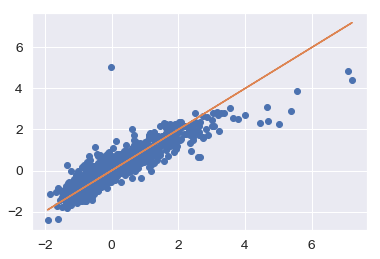

In [226]:
model_whole = linear_model.LinearRegression(fit_intercept = True)
model_whole.fit(X[features_list[5]].values, Y)
pred = model_whole.predict(X[features_list[5]].values)
plt.plot(Y, pred,'o')
plt.plot(Y, Y,'-')

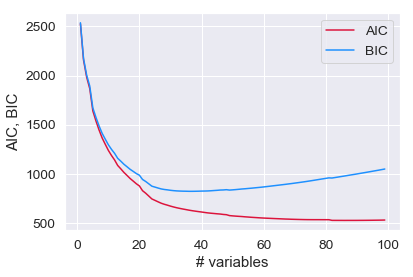

In [258]:
import statsmodels.api as sm

displ = np.arange( 99 ) + 1
aic = []
bic = []

from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

for i in range(1, 100):
    regr = OLS(Y, add_constant(X[features_list[i]].values)).fit()
    aic.append(regr.aic)
    bic.append(regr.bic)
    
    
plt.xlabel('# variables')
plt.ylabel('AIC, BIC')
plt.plot( displ, aic, color='crimson',label='AIC')
plt.plot( displ, bic, color='dodgerBlue',  label='BIC')
plt.legend()
plt.show()

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 


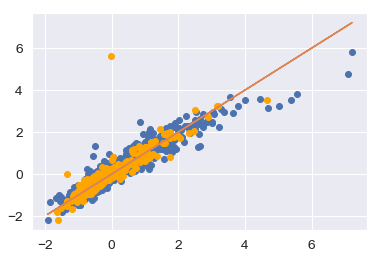

In [280]:
model_whole = linear_model.LinearRegression(fit_intercept = True)
model_whole.fit(X_train[features_list[25]].values, y_train)
pred = model_whole.predict(X_train[features_list[25]].values)
pred_test = model_whole.predict(X_test[features_list[25]].values)
plt.plot(y_train, pred,'o')
plt.plot(y_test, pred_test,'o', c='orange')

plt.plot(Y, Y,'-')

In [281]:
model_whole
d = measureAcc(model_whole, X[features_list[25]].values, Y)

calcAvg(d)

NameError: name 'Y_train' is not defined

In [297]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alphas = 10**np.linspace(5, -5, 100)*0.5

mses = []
mses_lasso = []
kf = KFold(n_splits=5, shuffle  = True)
ridge = Ridge()
lasso = Lasso()
for train_index, test_index in kf.split(X):
    mses_fold = []
    mses_fold_lasso = []
    
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y[train_index], Y[test_index]   
    for a in alphas:
        lasso.set_params(alpha = a) 
        ridge.set_params(alpha = a) 
        fitted = Ridge.fit(ridge, X_train,y_train)
        y_pred = Ridge.predict(ridge, X_test)
        MSE = mean_squared_error(y_test, y_pred)
        mses_fold.append(MSE)
        fitted = Lasso.fit(lasso, X_train,y_train)
        y_pred = Lasso.predict(lasso, X_test)
        MSE = mean_squared_error(y_test, y_pred)
        mses_fold_lasso.append(MSE)
    mses.append(mses_fold)
    mses_lasso.append(mses_fold_lasso)


C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\balin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


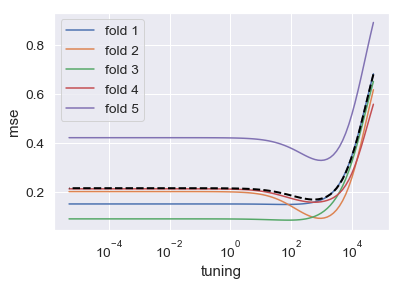

In [303]:
alphas = 10**np.linspace(5, -5, 100)*0.5
plt.xscale('log')
plt.plot(alphas, mses[0], label='fold 1')
plt.plot(alphas, mses[1], label='fold 2')
plt.plot(alphas, mses[2], label='fold 3')
plt.plot(alphas, mses[3], label='fold 4')
plt.plot(alphas, mses[4], label='fold 5')

plt.plot(alphas, np.average(mses, axis = 0), '--', c='black', linewidth=2)
plt.xlabel('tuning')
plt.ylabel('mse')
plt.legend()
plt.show()

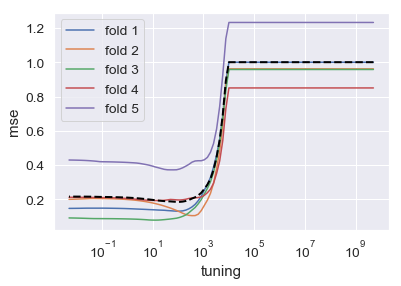

87.37642000038414

In [311]:
alphas = 10**np.linspace(10, -2, 100)*0.5
plt.xscale('log')
plt.plot(alphas, mses_lasso[0], label='fold 1')
plt.plot(alphas, mses_lasso[1], label='fold 2')
plt.plot(alphas, mses_lasso[2], label='fold 3')
plt.plot(alphas, mses_lasso[3], label='fold 4')
plt.plot(alphas, mses_lasso[4], label='fold 5')
plt.plot(alphas, np.average(mses_lasso, axis = 0), '--', c='black', linewidth=2)

plt.xlabel('tuning')
plt.ylabel('mse')
plt.legend()
plt.show()

alphas[np.argmin(np.average(mses_lasso, axis = 0))]
#alphas[np.argmin(np.average(mses, axis = 0))]

In [313]:
import keras


ModuleNotFoundError: No module named 'keras'